In [26]:
import sys
sys.path.append('../src')
from Params import *
from PlotFuncs import *
from Like import *
from AxionFuncs import *  
B_tach/1e-4


500000.0

In [15]:
B_rad=5e3
B_tach=50.0
B_outer=3.0

B_rad_max = 3e7*1e-4
B_rad_min = 2e6*1e-4
print('B_rad between',B_rad_min,B_rad_max,'T')

B_tach_max = B_tach*1
B_tach_min = 1e5*1e-4
print('B_tach between',B_tach_min,B_tach_max,'T')

B_outer_max = 4e4*1e-4
B_outer_min = 3e4*1e-4
print('B_outer between',B_outer_min,B_outer_max,'T')


B_rad between 200.0 3000.0 T
B_tach between 10.0 50.0 T
B_outer between 3.0 4.0 T


In [6]:
# Load fluxes
E_res = 2e-3
E_max = 1.0
nfine = 100
nE_bins = 50
Ei,E_bins = EnergyBins(E_res,E_max,nfine,nE_bins)
Flux10_0 = AxionFlux_Primakoff_PlasmonCorrection(1e-10,Ei)
Flux10_1 = AxionFlux_Lplasmon(1e-10,Ei,B_model_seismic_rad(B_rad=B_rad))
Flux10_2 = AxionFlux_Lplasmon(1e-10,Ei,B_model_seismic_tach(B_tach=B_tach))
Flux10_3 = AxionFlux_Lplasmon(1e-10,Ei,B_model_seismic_outer(B_outer=B_outer))

In [12]:
# Binned photon number tables
nm = 500
m_vals = logspace(-4.1,log10(5.1e-1),nm)

print('Flux0')
R_tab_0,R0_0 = BinnedPhotonNumberTable_AllModes(m_vals,Ei,E_bins,Flux10_0,res_on=False)
print('Flux1')
R_tab_1,R0_1 = BinnedPhotonNumberTable_AllModes(m_vals,Ei,E_bins,Flux10_1,res_on=False)
print('Flux2')
R_tab_2,R0_2 = BinnedPhotonNumberTable_AllModes(m_vals,Ei,E_bins,Flux10_2,res_on=False)
print('Flux3')
R_tab_3,R0_3 = BinnedPhotonNumberTable_AllModes(m_vals,Ei,E_bins,Flux10_3,res_on=False)

# Background
Background = BinnedBackgroundEvents(Ei,E_bins,background_level=1e-8)

Flux0
Flux1
Flux2
Flux3


In [13]:
m_DL_vals = logspace(-4,log10(5e-1),500)
# B_DL_1_3year = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,R_tab_0,R_tab_1,Background)
# B_DL_2_3year = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,R_tab_0,R_tab_2,Background)
# B_DL_3_3year = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,R_tab_0,R_tab_3,Background)

# B_DL_1_6year = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,2*R_tab_0,2*R_tab_1,Background)
# B_DL_2_6year = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,2*R_tab_0,2*R_tab_2,Background)
# B_DL_3_6year = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,2*R_tab_0,2*R_tab_3,Background)


B_DL_1_3year = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,R_tab_1) # Primakoff 
B_DL_2_3year = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,R_tab_2) # Primakoff 
B_DL_3_3year = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,R_tab_3) # Primakoff 

B_DL_1_6year = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,2*R_tab_1) # Primakoff 
B_DL_2_6year = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,2*R_tab_2) # Primakoff 
B_DL_3_6year = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,2*R_tab_3) # Primakoff 



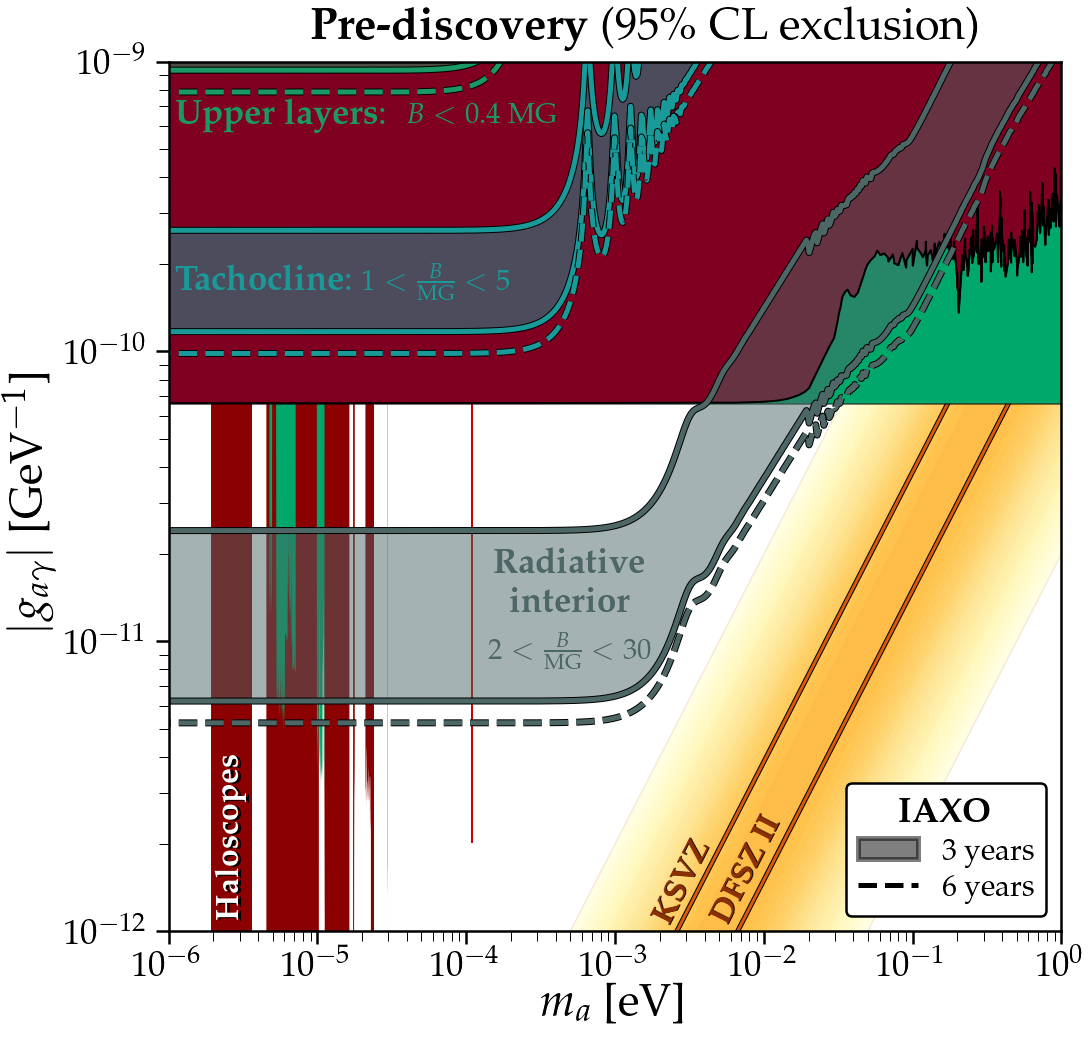

In [63]:
import matplotlib.patheffects as pe

fig,ax = AxionPlotSetup(CAST_text_on=False,StellarBounds_text_on=False)

path_effects=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()]
path_effects_w=[pe.Stroke(linewidth=7, foreground='w'), pe.Normal()]

IAXO_sens_col = 'blue'
IAXO_Bsens_col = [0.2,0.4,0.4]

# plt.plot(m_DL_vals,IAXO1,lw=5,color=IAXO_sens_col,zorder=0.12,alpha=0.8)
# plt.fill_between(m_DL_vals,IAXO1,y2=1,lw=3,color=IAXO_sens_col,zorder=0.12,alpha=0.2)
# plt.gcf().text(0.65,0.4,r'{\bf IAXO}',fontsize=45,color=IAXO_sens_col,alpha=0.8,rotation=60)

col1 = [0.3,0.4,0.4]
col2 = [0.1,0.6,0.6]
col3 = [0.1,0.6,0.4]
alph = 0.5

m_DL_vals1 = concatenate((array([1e-7]),m_DL_vals))

y1 = append(B_DL_1_3year[0],B_DL_1_3year)*sqrt(B_rad/B_rad_min)
y2 = append(B_DL_1_3year[0],B_DL_1_3year)*sqrt(B_rad/B_rad_max)
y1_1= append(B_DL_1_6year[0],B_DL_1_6year)*sqrt(B_rad/B_rad_min)
y2_1 = append(B_DL_1_6year[0],B_DL_1_6year)*sqrt(B_rad/B_rad_max)
plt.fill_between(m_DL_vals1,y1,y2=y2,alpha=alph,color=col1,zorder=1.5)
plt.plot(m_DL_vals1,y1,'-',lw=5,color=col1,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2,'-',lw=5,color=col1,path_effects=path_effects,zorder=1.5)
#plt.plot(m_DL_vals1,y1_1,'--',lw=5,color=col1,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2_1,'--',lw=5,color=col1,path_effects=path_effects,zorder=1.5)
ty1 = y1[0]

y1 = append(B_DL_2_3year[0],B_DL_2_3year)*sqrt(B_tach/B_tach_min)
y2 = append(B_DL_2_3year[0],B_DL_2_3year)*sqrt(B_tach/B_tach_max)
y1_1= append(B_DL_2_6year[0],B_DL_2_6year)*sqrt(B_tach/B_tach_min)
y2_1 = append(B_DL_2_6year[0],B_DL_2_6year)*sqrt(B_tach/B_tach_max)
plt.fill_between(m_DL_vals1,y1,y2=y2,alpha=alph,color=col2,zorder=1.5)
plt.plot(m_DL_vals1,y1,'-',lw=5,color=col2,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2,'-',lw=5,color=col2,path_effects=path_effects,zorder=1.5)
#plt.plot(m_DL_vals1,y1_1,'--',lw=5,color=col2,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2_1,'--',lw=5,color=col2,path_effects=path_effects,zorder=1.5)
ty2 = y1[0]



y1 = append(B_DL_3_3year[0],B_DL_3_3year)*sqrt(B_outer/B_outer_min)
y2 = append(B_DL_3_3year[0],B_DL_3_3year)*sqrt(B_outer/B_outer_max)
y1_1= append(B_DL_3_6year[0],B_DL_3_6year)*sqrt(B_outer/B_outer_min)
y2_1 = append(B_DL_3_6year[0],B_DL_3_6year)*sqrt(B_outer/B_outer_max)
plt.fill_between(m_DL_vals1,y1,y2=y2,alpha=alph,color=col3,zorder=1.5)
plt.plot(m_DL_vals1,y1,'-',lw=5,color=col3,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2,'-',lw=5,color=col3,path_effects=path_effects,zorder=1.5)
#plt.plot(m_DL_vals1,y1_1,'--',lw=5,color=col3,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2_1,'--',lw=5,color=col3,path_effects=path_effects,zorder=1.5)
ty3 = y2_1[0]


#plt.gcf().text(0.495,0.53,r'{\bf Solar $B$-field}',fontsize=42,color=IAXO_Bsens_col,horizontalalignment='center')
#plt.gcf().text(0.495,0.53-0.03,r'{\bf sensitivity}',fontsize=42,color=IAXO_Bsens_col,horizontalalignment='center')

tfs = 35

plt.text(5e-4,ty1/1.4,r'{\bf Radiative}',color=col1,fontsize=tfs,ha='center')
plt.text(5e-4,ty1/1.9,r'{\bf interior}',color=col1,fontsize=tfs,ha='center')
plt.text(5e-4,ty1/3,r'$2<\frac{B}{\rm MG}<30$',color=col1,fontsize=tfs-6,ha='center')

plt.text(1.1e-6,ty2/1.6,r'{\bf Tachocline}:',color=col2,fontsize=tfs)
plt.text(2e-5,ty2/1.6,r'$1<\frac{B}{\rm MG}<5$',color=col2,fontsize=tfs-6,va='center')


plt.text(1.1e-6,ty3*0.78,r'{\bf Upper layers}:',color=col3,fontsize=tfs)
plt.text(4e-5,ty3*0.78,r'$B<0.4$ MG',color=col3,fontsize=tfs-6)

plt.fill_between([1e-7,1e-8],[1,1],y2=[1,1],lw=5,label='3 years',alpha=alph,color='k')
plt.plot([1e-7,1e-8],[1,1],'k--',lw=5,label='6 years')


handles, labels = plt.gca().get_legend_handles_labels()
leg = plt.legend(flipud(handles), flipud(labels),fontsize=30,frameon=True,title=r'{\bf IAXO}',loc='lower right',framealpha=1,edgecolor='k',labelspacing=0.2)
leg.get_frame().set_linewidth(2.5)

plt.gcf().text(0.54,0.9,r'{\bf Pre-discovery} (95\% CL exclusion)',fontsize=45,ha='center')

MySaveFig(fig,'IAXO_SeismicBfield_sensitivity')

# IAXO+ with single Buffer gas setting

In [82]:
def BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10,\
                           Bfield=2.5,Exposure=2.0,Length=20.0,\
                           N_bores=8,BoreDiameter=60.0,eps_D=0.7,eps_T=0.8,res_on=False,
                                    T_operating=1.8,pressure_offset=0.999999):
    nm = size(m_vals)
    nE_bins = shape(E_bins)[0]
    nfine = int(shape(Ei)[0]/nE_bins)

    # Buffer gas part:
    Signal_10_BG1 = zeros(shape=(nE_bins,nm))
    T_operating=1.8
    p_vals = pressure_offset*(m_vals)**2.0*T_operating/0.02
    mask = p_vals<16.405
    p_vals[~mask] = 100.0
    n_p = sum(mask)

    E_min = amin(Ei)
    
    if res_on==False:
        E_min = 0.0
    for j in range(0,nm):
        if p_vals[j]<100.0:
            dN = PhotonNumber_gag_BufferGas(Ei,Flux10,m_vals[j],p_vals[j],g=1e-10,\
                     Bfield=Bfield,Exposure=Exposure,Length=Length,T_operating=T_operating,\
                     N_bores=N_bores,BoreDiameter=BoreDiameter,eps_D=eps_D,eps_T=eps_T,Eres=E_min)
            for i in range(0,nE_bins):
                Ebin = Ei[i*nfine:(i+1)*nfine]
                dNbin = dN[i*nfine:(i+1)*nfine]
                Signal_10_BG1[i,j] = sum(0.5*(Ebin[1:]-Ebin[0:-1])*(dNbin[1:]+dNbin[0:-1]))

    return Signal_10_BG1
        
# Mass values
nm = 500
m_vals = logspace(-4.51,1.1,nm)


# Load fluxes
E_res = 1e-3
E_max = 1.0
nfine = 100
nE_bins = 50
Ei,E_bins = EnergyBins(E_res,E_max,nfine,nE_bins)
Flux10_0 = AxionFlux_Primakoff_PlasmonCorrection(1e-10,Ei)
Flux10_1 = AxionFlux_Lplasmon(1e-10,Ei,B_model_seismic_rad(B_rad=B_rad))
Flux10_2 = AxionFlux_Lplasmon(1e-10,Ei,B_model_seismic_tach(B_tach=B_tach))
Flux10_3 = AxionFlux_Lplasmon(1e-10,Ei,B_model_seismic_outer(B_outer=B_outer))

# Parameters
res_on = True
po1 = 0.0
po2 = 0.0

# IAXO
Exposure = 6.0
#R0_0 = BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10_0,res_on=res_on,Exposure=Exposure)
R0_1 = BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10_1,res_on=res_on,Exposure=Exposure)
R0_2 = BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10_2,res_on=res_on,Exposure=Exposure,pressure_offset=po1)
R0_3 = BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10_3,res_on=res_on,Exposure=Exposure,pressure_offset=po2)

# IAXO+
Exposure = 12.0
#R1_0 = BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10_0,res_on=res_on,Exposure=6.0,Length=22.0,Bfield=3.5,BoreDiameter=60.0)
R1_1 = BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10_1,res_on=res_on,Exposure=Exposure,Length=22.0,Bfield=3.5,BoreDiameter=60.0)
R1_2 = BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10_2,res_on=res_on,Exposure=Exposure,Length=22.0,Bfield=3.5,BoreDiameter=60.0,pressure_offset=po1)
R1_3 = BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10_3,res_on=res_on,Exposure=Exposure,Length=22.0,Bfield=3.5,BoreDiameter=60.0,pressure_offset=po2)



Background = BinnedBackgroundEvents(Ei,E_bins,background_level=1e-9)

In [83]:
m_DL_vals = logspace(-4.5,0,500)
# B_DL_1_5year = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,R_tab_0,R_tab_1,Background)
# B_DL_2_5year = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,R_tab_0,R_tab_2,Background)
# B_DL_3_5year = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,R_tab_0,R_tab_2,Background)

# B_DL_1_10year = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,2*R_tab_0,2*R_tab_1,Background)
# B_DL_2_10year = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,2*R_tab_0,2*R_tab_2,Background)
# B_DL_3_10year = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,2*R_tab_0,2*R_tab_2,Background)


# IAXO
B_DL_1_0 = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,R0_1) 
B_DL_2_0 = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,R0_2) 
B_DL_3_0 = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,R0_3) 

# IAXO+
B_DL_1_1 = ConstantObsNumberLine(1.0,m_DL_vals,m_vals,R1_1) 
B_DL_2_1 = ConstantObsNumberLine(1.0,m_DL_vals,m_vals,R1_2) 
B_DL_3_1 = ConstantObsNumberLine(1.0,m_DL_vals,m_vals,R1_3) 



../src/Like.py:90: RuntimeWarning: divide by zero encountered in double_scalars
  g[i] = 1e-10*(N_ob/sum(N_exp_10))**0.25


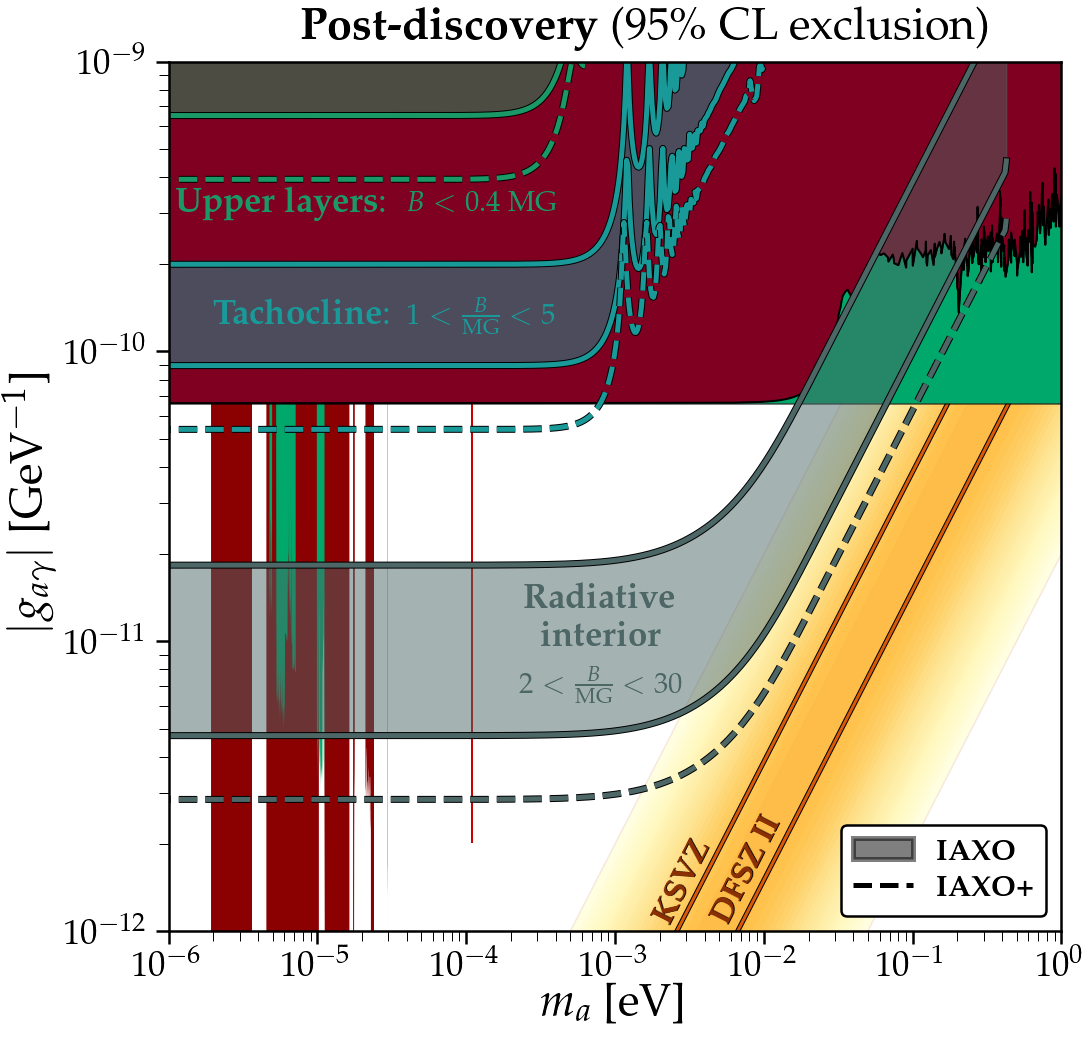

In [88]:
import matplotlib.patheffects as pe

fig,ax = AxionPlotSetup(CAST_text_on=False,StellarBounds_text_on=False,Haloscopes_text_on=False)


m_DL_vals1 = concatenate((array([1e-7]),m_DL_vals))
y1 = append(B_DL_1_0[0],B_DL_1_0)*sqrt(B_rad/B_rad_min)
y2 = append(B_DL_1_0[0],B_DL_1_0)*sqrt(B_rad/B_rad_max)
y1_1= append(B_DL_1_1[0],B_DL_1_1)*sqrt(B_rad/B_rad_min)
y2_1 = append(B_DL_1_1[0],B_DL_1_1)*sqrt(B_rad/B_rad_max)
plt.fill_between(m_DL_vals1,y1,y2=y2,alpha=alph,color=col1,zorder=1.5)
plt.plot(m_DL_vals1,y1,'-',lw=5,color=col1,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2,'-',lw=5,color=col1,path_effects=path_effects,zorder=1.5)
#plt.plot(m_DL_vals1,y1_1,'--',lw=5,color=col1,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2_1,'--',lw=5,color=col1,path_effects=path_effects,zorder=1.5)
ty1 = y1[0]

y1 = append(B_DL_2_0[0],B_DL_2_0)*sqrt(B_tach/B_tach_min)
y2 = append(B_DL_2_0[0],B_DL_2_0)*sqrt(B_tach/B_tach_max)
y1_1= append(B_DL_2_1[0],B_DL_2_1)*sqrt(B_tach/B_tach_min)
y2_1 = append(B_DL_2_1[0],B_DL_2_1)*sqrt(B_tach/B_tach_max)
plt.fill_between(m_DL_vals1,y1,y2=y2,alpha=alph,color=col2,zorder=1.5)
plt.plot(m_DL_vals1,y1,'-',lw=5,color=col2,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2,'-',lw=5,color=col2,path_effects=path_effects,zorder=1.5)
#plt.plot(m_DL_vals1,y1_1,'--',lw=5,color=col2,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2_1,'--',lw=5,color=col2,path_effects=path_effects,zorder=1.5)
ty2 = y1[0]


B_outer_min = 1.0
y1 = append(B_DL_3_0[0],B_DL_3_0)*sqrt(B_outer/B_outer_min)
y2 = append(B_DL_3_0[0],B_DL_3_0)*sqrt(B_outer/B_outer_max)
y1_1= append(B_DL_3_1[0],B_DL_3_1)*sqrt(B_outer/B_outer_min)
y2_1 = append(B_DL_3_1[0],B_DL_3_1)*sqrt(B_outer/B_outer_max)
plt.fill_between(m_DL_vals1,y1,y2=y2,alpha=alph,color=col3,zorder=1.5)
plt.plot(m_DL_vals1,y1,'-',lw=5,color=col3,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2,'-',lw=5,color=col3,path_effects=path_effects,zorder=1.5)
#plt.plot(m_DL_vals1,y1_1,'--',lw=5,color=col3,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2_1,'--',lw=5,color=col3,path_effects=path_effects,zorder=1.5)
ty3 = y2_1[0]


tfs = 35
plt.text(8e-4,ty1/1.4,r'{\bf Radiative}',color=col1,fontsize=tfs,ha='center')
plt.text(8e-4,ty1/1.9,r'{\bf interior}',color=col1,fontsize=tfs,ha='center')
plt.text(8e-4,ty1/3,r'$2<\frac{B}{\rm MG}<30$',color=col1,fontsize=tfs-6,ha='center')

plt.text(2e-6,ty2/1.6,r'{\bf Tachocline}:',color=col2,fontsize=tfs)
plt.text(4e-5,ty2/1.6,r'$1<\frac{B}{\rm MG}<5$',color=col2,fontsize=tfs-6,va='center')


plt.text(1.1e-6,ty3*0.78,r'{\bf Upper layers}:',color=col3,fontsize=tfs)
plt.text(4e-5,ty3*0.78,r'$B<0.4$ MG',color=col3,fontsize=tfs-6)

plt.fill_between([1e-7,1e-8],[1,1],y2=[1,1],lw=5,label=r'{\bf IAXO}',alpha=alph,color='k')
plt.plot([1e-7,1e-8],[1,1],'k--',lw=5,label=r'{\bf IAXO+}')


handles, labels = plt.gca().get_legend_handles_labels()
leg = plt.legend(flipud(handles), flipud(labels),fontsize=30,frameon=True,loc='lower right',framealpha=1,edgecolor='k',labelspacing=0.2)
leg.get_frame().set_linewidth(2.5)

plt.gcf().text(0.54,0.9,r'{\bf Post-discovery} (95\% CL exclusion)',fontsize=45,ha='center')

MySaveFig(fig,'IAXO_SeismicBfield_sensitivity_post_discovery')

In [279]:
m_DL_vals1[-1]

1.0

../src/Like.py:90: RuntimeWarning: divide by zero encountered in double_scalars
  g[i] = 1e-10*(N_ob/sum(N_exp_10))**0.25


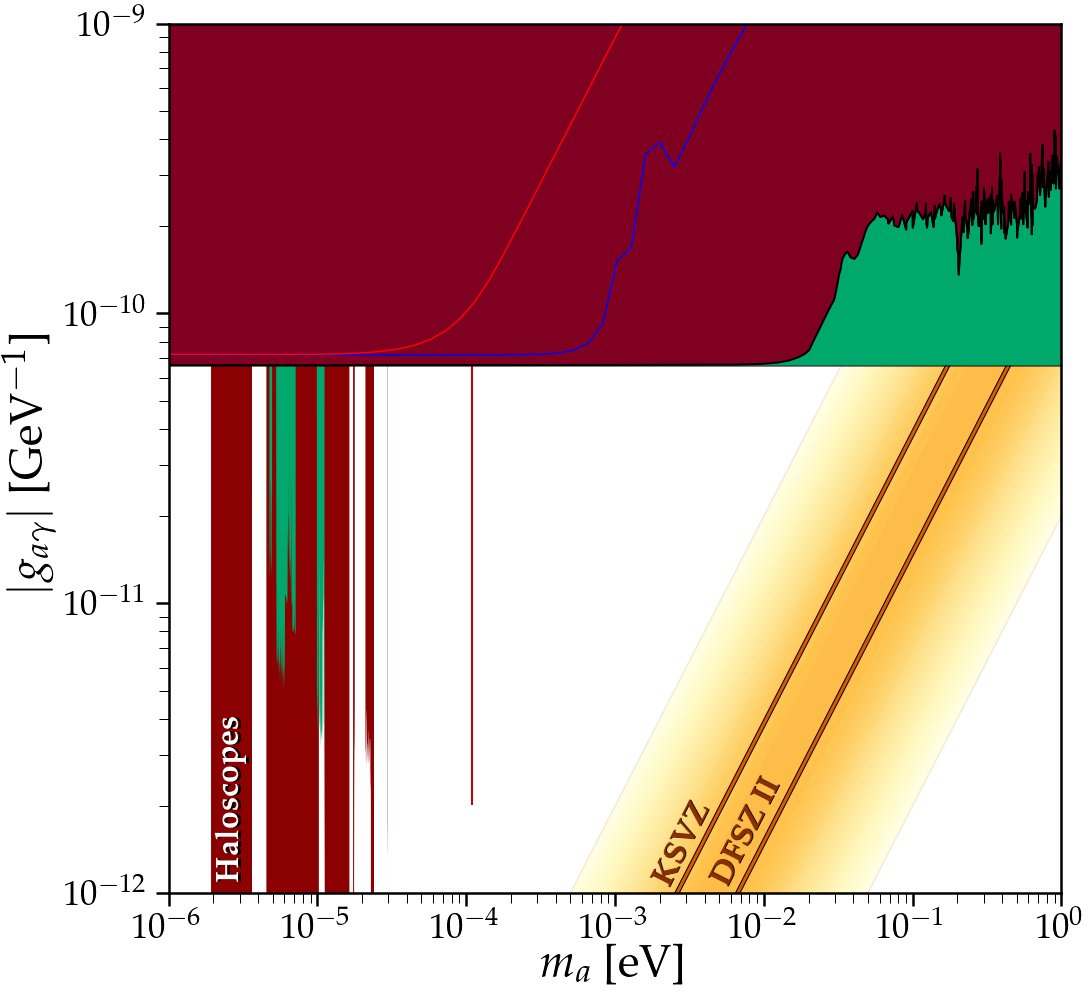

In [267]:
fig,ax = AxionPlotSetup(CAST_text_on=False,StellarBounds_text_on=False)

po = 0.0
R1_2 = BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10_2,res_on=res_on,Exposure=Exposure,Length=22.0,Bfield=3.5,BoreDiameter=60.0,pressure_offset=po)
B_DL_2_0 = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,R1_2) 
y2 = append(B_DL_2_0[0],B_DL_2_0)*sqrt(B_tach/B_tach_max)
plt.plot(m_DL_vals1,y2,'b')

po = 0.999
R1_2 = BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10_2,res_on=res_on,Exposure=Exposure,Length=22.0,Bfield=3.5,BoreDiameter=60.0,pressure_offset=po)
B_DL_2_0 = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,R1_2) 
y2 = append(B_DL_2_0[0],B_DL_2_0)*sqrt(B_tach/B_tach_max)
plt.plot(m_DL_vals1,y2,'r-')

In [ ]:
r0_12=0.712
r0_31=0.96
region1 = r<r0_12
region2 = abs(r-r0_12)<d2
region3 = abs(r-r0_31)<d3
wp1_lims = [amin(wp[region1]),amax(wp[region1])]
wp2_lims = [amin(wp[region2]),amax(wp[region2])]
wp3_lims = [amin(wp[region3]),amax(wp[region3])]



# Load fluxes
nfine = 1000
E_res = 1e-3

Ei_0 = logspace(log10(E_res),log10(20.0),nfine)
Flux10_0 = AxionFlux_Primakoff_PlasmonCorrection(1e-10,Ei_0)

Ei_1 = logspace(log10(E_res),log10(wp1_lims[1]+3*Eres),nfine)
Flux10_1 = AxionFlux_Lplasmon(1e-10,Ei_1,B_model_seismic_rad())

Ei_2 = logspace(log10(E_res),log10(wp2_lims[1]+3*Eres),nfine)
Flux10_2 = AxionFlux_Lplasmon(1e-10,Ei_2,B_model_seismic_tach())

Ei_3 = logspace(log10(E_res),log10(wp3_lims[1]+3*Eres),nfine)
Flux10_3 = AxionFlux_Lplasmon(1e-10,Ei_3,B_model_seismic_outer())

mask1 = (Ei_0<wp1_lims[1]+3*Eres)*(Ei_0>wp1_lims[0]-3*Eres)
mask2 = (Ei_0<wp2_lims[1]+3*Eres)*(Ei_0>wp2_lims[0]-3*Eres)
mask3 = (Ei_0<wp3_lims[1]+3*Eres)*(Ei_0>wp3_lims[0]-3*Eres)

nm = 500
mvals = logspace(-6,0,nm)


Ncrit = 5
g1 = zeros(shape=nm)
g2 = zeros(shape=nm)
g3 = zeros(shape=nm)

for i in range(0,nm):
    m_a = mvals[i]
    dN0 = PhotonNumber_gag(Ei_0,Flux10_0,m_a,g=1e-10,Eres=E_res)
    N0_1 = trapz(dN0[mask1],Ei_0[mask1])
    N0_2 = trapz(dN0[mask1],Ei_0[mask1])
    N0_3 = trapz(dN0[mask1],Ei_0[mask1])

    N1 = trapz(PhotonNumber_gag(Ei_1,Flux10_1,m_a,g=1e-10,Eres=E_res,Bfield=3.5,Exposure=3.0,Length = 22.0),Ei_1)
    N2 = trapz(PhotonNumber_gag(Ei_2,Flux10_2,m_a,g=1e-10,Eres=E_res,Bfield=3.5,Exposure=3.0,Length = 22.0),Ei_2)
    N3 = trapz(PhotonNumber_gag(Ei_3,Flux10_3,m_a,g=1e-10,Eres=E_res,Bfield=3.5,Exposure=3.0,Length = 22.0),Ei_3)
    
    g1[i] = ((Ncrit/N1)*(1e-10)**4.0)**(1/4)
    g2[i] = ((Ncrit/N2)*(1e-10)**4.0)**(1/4)
    g3[i] = ((Ncrit/N3)*(1e-10)**4.0)**(1/4)




In [ ]:

fig,ax = AxionPlotSetup(CAST_text_on=False,Haloscopes_text_on=False)

B_rad_rs = (array([4e3,7e3])/5e3)**2.0
B_tach_rs = (array([50.0,100.0])/50.0)**2.0
B_outer_rs = (array([3.0,5.0])/3.0)**2.0

alph = 0.9
col = 'plum'
fcolor='rebeccapurple'
plt.fill_between(mvals,g1/B_rad_rs[0],y2=g1/B_rad_rs[1],lw=3,color=col,alpha=alph,zorder=0.13)
plt.fill_between(mvals,g2/B_tach_rs[0],y2=g2/B_tach_rs[1],lw=3,color=col,alpha=alph,zorder=2)
plt.fill_between(mvals,g3/B_outer_rs[0],y2=g3/B_outer_rs[1],lw=3,color=col,alpha=alph,zorder=2)


plt.plot(mvals,g1/B_rad_rs[0],'-',zorder=0.13,lw=4,color=fcolor,path_effects=path_effects)
plt.plot(mvals,g1/B_rad_rs[1],'-',zorder=0.13,lw=4,color=fcolor,path_effects=path_effects)
plt.plot(mvals,g2/B_tach_rs[0],'-',zorder=2,lw=4,color=fcolor,path_effects=path_effects)
plt.plot(mvals,g2/B_tach_rs[1],'-',zorder=2,lw=4,color=fcolor,path_effects=path_effects)
plt.plot(mvals,g3/B_outer_rs[0],'-',zorder=2,lw=4,color=fcolor,path_effects=path_effects)
plt.plot(mvals,g3/B_outer_rs[1],'-',zorder=2,lw=4,color=fcolor,path_effects=path_effects)

plt.gcf().text(0.17,0.81,r'$B_{\rm outer} \in 3$--$5$ G',color='k',fontsize=35)
plt.gcf().text(0.2,0.55,r'$B_{\rm tach.} \in 50$--$100$ G',color='k',fontsize=35)
plt.gcf().text(0.2,0.26,r'$B_{\rm rad.} \in (4$--$7) \times 10^3$ G',color='k',fontsize=35)


plt.fill_between([0.6e-2,1.0e0,1.0e0,0.6e-1],[1e-12,1e-12,8e-12,8e-12],facecolor='w',edgecolor='k',lw=3)
plt.gcf().text(0.82,0.3,r'{\bf IAXO+}',fontsize=37,horizontalalignment='center')
plt.gcf().text(0.82,0.3-0.05,r'$B = 3.5$ T',fontsize=35,horizontalalignment='center')
plt.gcf().text(0.82,0.3-0.1,r'$L = 22$ m',fontsize=35,horizontalalignment='center')
plt.gcf().text(0.82,0.3-0.15,r'$T = 5$ yr',fontsize=35,horizontalalignment='center')


plt.quiver(mvals[200],1.02*g1[200]/B_rad_rs[0],0.0,1.0,zorder=10)
plt.quiver(mvals[150],1.02*g2[150]/B_tach_rs[0],0.0,1.0,zorder=10)
plt.quiver(mvals[200],g3[200]/B_outer_rs[0],0.0,1.0,zorder=10)

MySaveFig(fig,'IAXO_B_r_sensitivity')

In [ ]:
from scipy.integrate import cumtrapz
fig,ax = MySquarePlot('$E_\gamma$ [keV]','$N_\gamma(E^\prime_\gamma<E_\gamma)$')



m_a = 1.0e-4

i_r_min = 1400

E_min = wp[i_r_min]
E_max = wp[0]

rmin = r[i_r_min]
rmax = r[0]


cols = cm.rainbow(linspace(0,1,6))


Nmin = 5

ymax = 1e10
ymin = 7e-3
rs = zeros(shape=6)
ii = 0
for col,Eres in zip(cols,[1e-3,2e-3,4e-3,10e-3,20e-3,70e-3]):
    Ei = logspace(log10(1.0e-3),log10(E_max),1200)
    Flux10_1 = AxionFlux_Lplasmon(1e-10,Ei,B_model_seismic())
    dN = PhotonNumber_gag(Ei,Flux10_1,1e-6,g=1e-10,Eres=Eres)
    N = cumtrapz(dN,Ei)

    i_min = argmin(abs(Ei-3*Eres))
    plt.plot([3*Eres,3*Eres],[5.0,ymax],'-',lw=1.5,color=col)
    
    rs[ii] = 5.0/N[i_min]
    
    plt.loglog(Ei[0:-1],N*rs[ii],lw=3,path_effects=path_effects,label=str(int(Eres*1000)),color=col)
    ii += 1

plt.xlim(right=E_max)

ax.tick_params(which='major',top=False)
ax.tick_params(which='minor',top=False)


gscale = (rs*(1e-10)**4.0)**(1/4)


r_vals = [0.95,0.9,0.8,0.6,0.5,0.4,0.3,0.2,0.1]
for ri in r_vals:
    i_r = argmin(abs(r-ri))
    ax.plot([wp[i_r],wp[i_r]],[ymax,ymax/2],color='k')
    plt.text(wp[i_r]*1.0,ymax*2,str(ri),fontsize=25,color='k',rotation=0,rotation_mode='anchor',horizontalalignment='center')

plt.title('$r$ [$R_\odot$]',pad=50,fontsize=40)
plt.ylim(top=ymax,bottom=ymin)
    
leg = plt.legend(fontsize=30,frameon=True,title=r'$E_{\rm res}$ [eV]',loc="center",framealpha=1,edgecolor='k',labelspacing=0.2,bbox_to_anchor=(0.12,0.76))
plt.setp(leg.get_title(),fontsize=30)
leg.get_frame().set_linewidth(2.5)

In [ ]:
N = g**4 * B**2

g = (N**1/4/B**1/2)